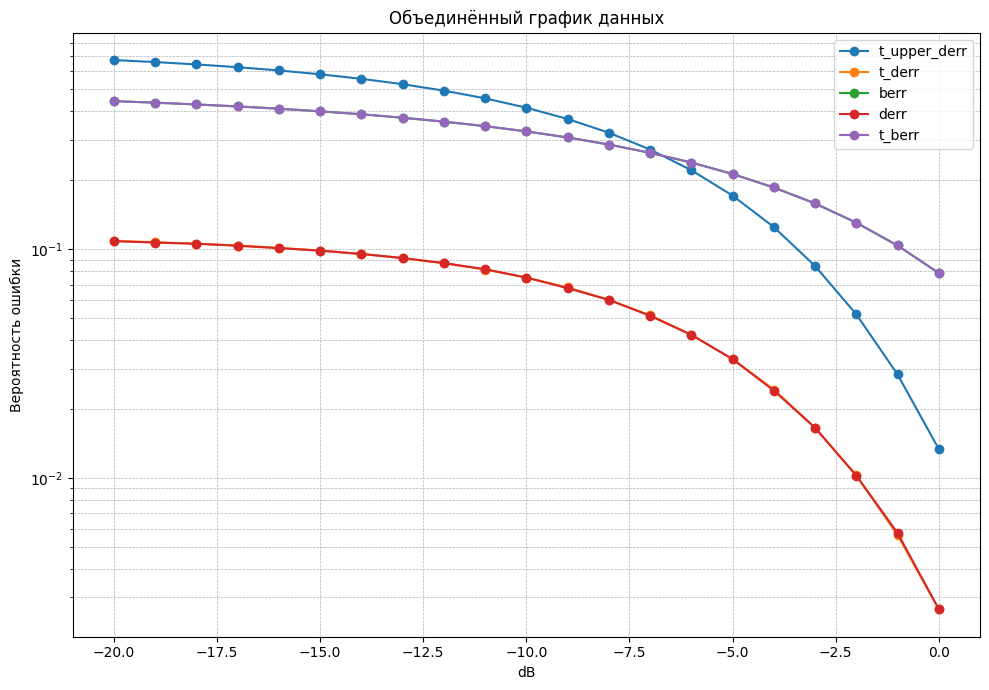

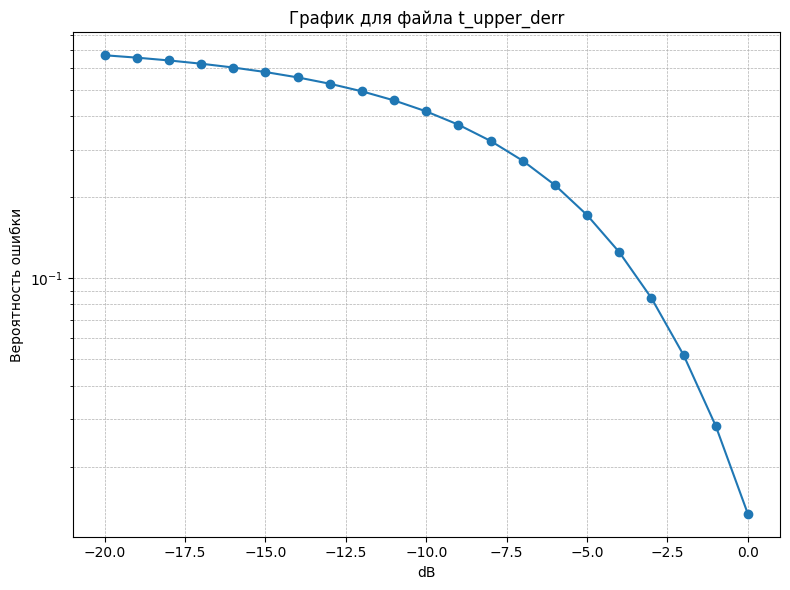

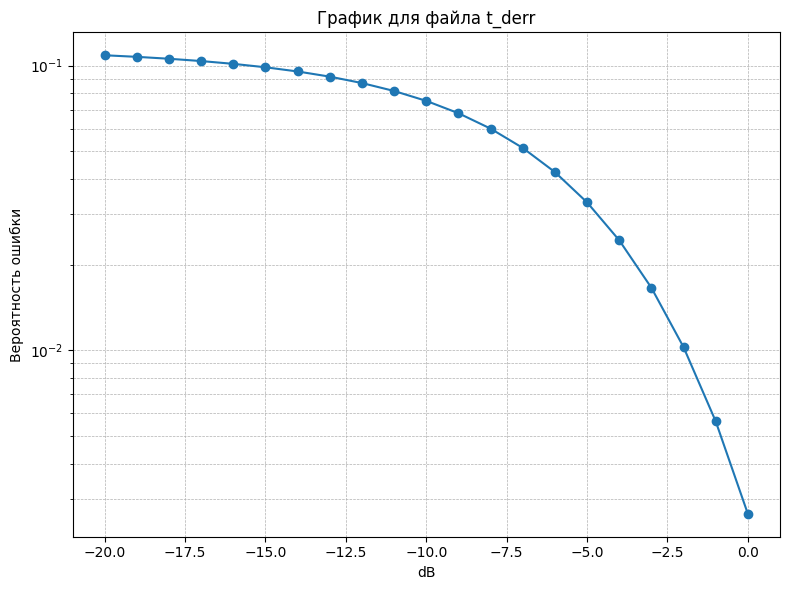

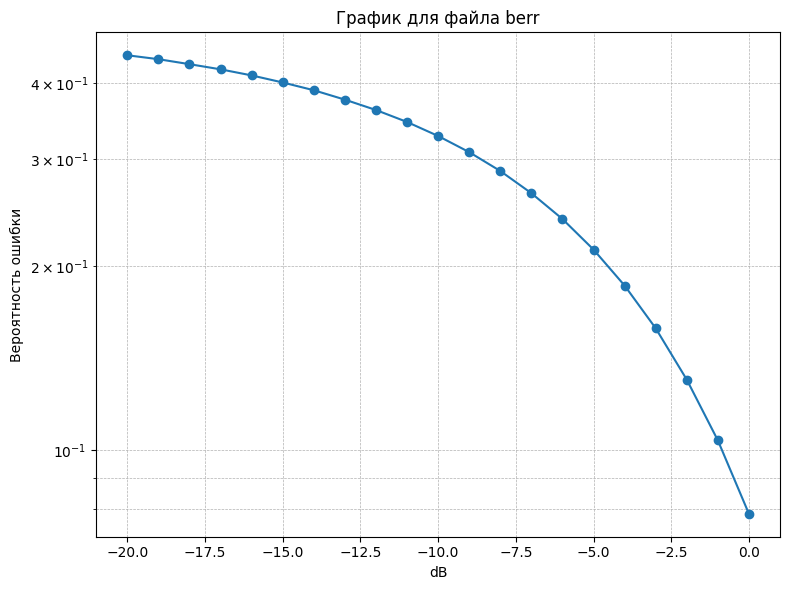

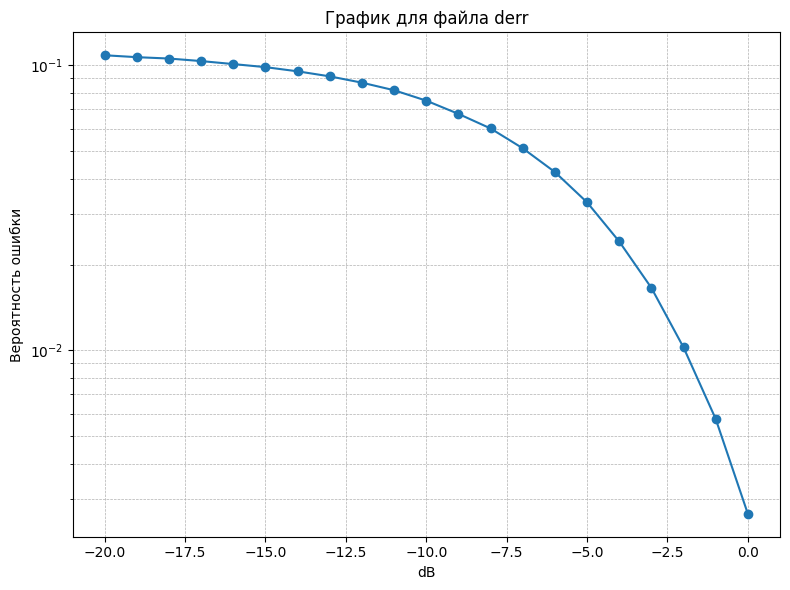

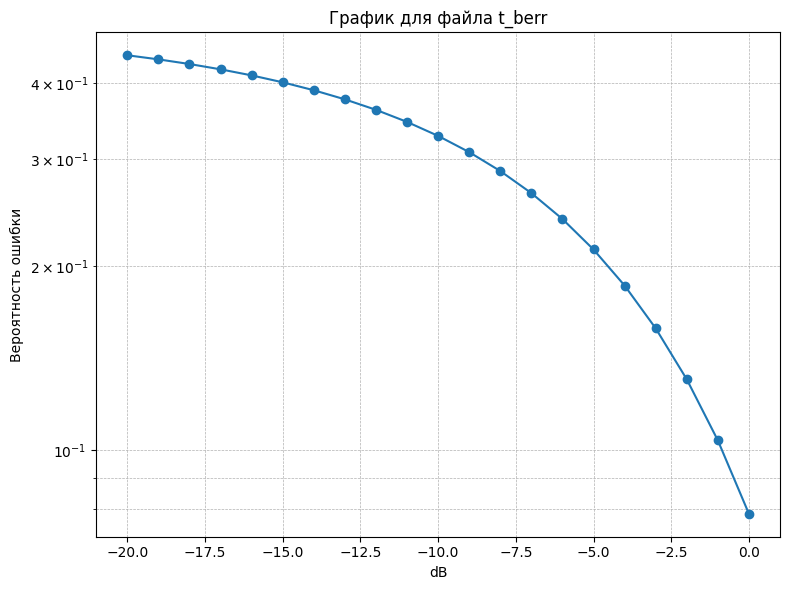

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

data_dir = "../data"

min_db = -20
max_db = 1
duration = 1.0

file_list = glob.glob(os.path.join(data_dir, "*.txt"))

all_data = []

for file_path in file_list:
    with open(file_path, "r") as f:
        # Читаем первую строку — количество точек
        first_line = f.readline().strip()
        if not first_line:
            continue
        try:
            n_points = int(first_line)
        except ValueError:
            print(f"Неверное значение количества точек в файле {os.path.basename(file_path)}")
            continue

        # Считываем значения
        values = []
        for line in f:
            line = line.strip()
            if line:
                try:
                    values.append(float(line))
                except ValueError:
                    continue

    
    if len(values) != n_points:
        print(f"В файле {os.path.basename(file_path)} указано {n_points} точек, но считано {len(values)} значений.")

    # Ось x
    x = np.arange(min_db, max_db, duration)
    y = np.array(values)
    all_data.append((x, y, os.path.basename(file_path)))

# Построение объединённого графика для всех файлов
plt.figure(figsize=(10, 7))
for x, y, fname in all_data:
    plt.semilogy(x, y, marker="o", linestyle="-", label=fname.split('.')[0])
plt.xlabel("dB")
plt.ylabel("Вероятность ошибки")
plt.title("Объединённый график данных")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# Построение отдельных графиков для каждого файла
for x, y, fname in all_data:
    plt.figure(figsize=(8, 6))
    plt.semilogy(x, y, marker="o", linestyle="-")
    plt.xlabel("dB")
    plt.ylabel("Вероятность ошибки")
    plt.title(f"График для файла {fname.split('.')[0]}")
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()
